In [86]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

In [87]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [88]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [89]:
def read_table2(filename = 'data/World_population_estimates.html'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table2 = tables[2]
    table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
    return table2

In [90]:
table2.shape

(67, 12)

In [91]:
census = table2.census / 1e9
census.shape

(67,)

In [92]:
un = table2.un / 1e9
un.shape

(67,)

In [93]:
table2.index

Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype='int64', name='Year')

In [94]:
table2.columns

Index(['Year', 'census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben',
       'mj', 'thomlinson', 'durand', 'clark'],
      dtype='object')

In [95]:
table2.values

array([[1950, 2557628654, 2516000000.0, 2525149000.0, 2544000000.0,
        2527960000.0, 2400000000.0, 2527000000.0, 2500000000.0,
        2400000000.0, nan, 2486000000.0],
       [1951, 2594939877, nan, 2572850917.0, 2571663000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1952, 2636772306, nan, 2619292068.0, 2617949000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1953, 2682053389, nan, 2665865392.0, 2665959000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1954, 2730228104, nan, 2713172027.0, 2716927000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1955, 2782098943, nan, 2761650981.0, 2769074000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1956, 2835299673, nan, 2811572031.0, 2822502000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1957, 2891349717, nan, 2863042795.0, 2879934000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1958, 2948137248, nan, 2916030167.0, 2939254000.0, nan, nan, nan,
        nan, nan, nan, nan],
  

In [96]:
census.name

'census'

In [97]:
census.values

array([2.55762865, 2.59493988, 2.63677231, 2.68205339, 2.7302281 ,
       2.78209894, 2.83529967, 2.89134972, 2.94813725, 3.00071659,
       3.04300151, 3.08396693, 3.14009322, 3.20982788, 3.28120131,
       3.35042579, 3.42067792, 3.49033371, 3.56231382, 3.63715905,
       3.71269774, 3.79032695, 3.86656865, 3.94209644, 4.01660881,
       4.08908323, 4.16018501, 4.23208458, 4.30410575, 4.37901394,
       4.45136274, 4.53441012, 4.61456656, 4.69573674, 4.77456939,
       4.8564627 , 4.94057123, 5.02720049, 5.11455717, 5.20144011,
       5.28895593, 5.37158592, 5.45613628, 5.53826832, 5.61868213,
       5.69920299, 5.77944059, 5.85797254, 5.93521325, 6.01207492,
       6.08857138, 6.16521925, 6.24201635, 6.31859096, 6.39569951,
       6.47304473, 6.55126353, 6.62991376, 6.70904978, 6.78821439,
       6.85858475, 6.93599949, 7.01387131, 7.09212809, 7.16996819,
       7.24789279, 7.32599671])

In [98]:
census.index

Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype='int64', name='Year')

In [99]:
type(table2)

pandas.core.frame.DataFrame

In [100]:
type(table2.index)

pandas.core.indexes.base.Index

In [101]:
type(table2.columns)

pandas.core.indexes.base.Index

In [102]:
type(table2.values)

numpy.ndarray

In [103]:
type(census)

pandas.core.series.Series

In [104]:
type(census.index)

pandas.core.indexes.base.Index

In [105]:
type(census.values)

numpy.ndarray

In [106]:
table2.shape

(67, 12)

In [111]:
# optional Exercise: 

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')
from modsim import *

In [112]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [113]:
from pandas import read_html

filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

In [114]:
table1 = tables[1]
table1.head()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[24],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']

In [146]:
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')

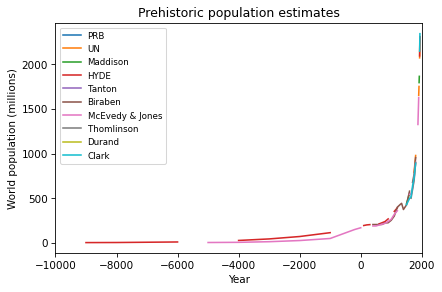

In [147]:
table1.plot()
decorate(xlim=[-10000, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistoric population estimates')
plt.legend(fontsize='small');

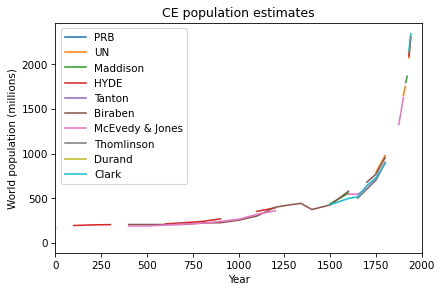

In [148]:
table1.plot()
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')

In [149]:
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [150]:
un = table2.un / 1e9
census = table2.census / 1e9

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
          ...   
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: census, Length: 67, dtype: float64

In [182]:
hyde = table1.HYDE/1e3
hyde = hyde[11:,]
hyde.fillna(0)

Year
1       0.000
100     0.195
200     0.202
300     0.205
350     0.000
400     0.209
500     0.000
600     0.213
700     0.226
800     0.240
900     0.269
1000    0.000
1100    0.353
1200    0.393
1250    0.000
1300    0.392
1340    0.000
1400    0.390
1500    0.000
1600    0.000
1650    0.000
1700    0.000
1750    0.814
1800    0.000
1820    0.000
1850    1.263
1870    0.000
1875    0.000
1900    0.000
1910    1.777
1913    0.000
1920    1.912
1925    0.000
1930    2.092
1940    2.307
Name: HYDE, dtype: float64

In [183]:
t_0 = hyde.index[0]
t_end = hyde.index[-1]

1940

In [184]:
p_0 = hyde[t_0]
p_end = hyde[t_end]

2.307

In [185]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                p_end=p_end,
                alpha=0.025,
                beta=-0.0018)

namespace(t_0=1, t_end=1940, p_0=nan, p_end=2.307, alpha=0.025, beta=-0.0018)

In [186]:

def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_end] = system.p_end
    
    for t in linrange(system.t_end, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [188]:
def update_func(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

In [189]:
results = run_simulation(system, update_func)

Time
1940    2.307000
1941    2.355095
Name: Quantity, dtype: float64

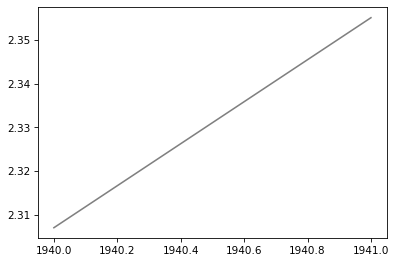

In [190]:
from matplotlib.pyplot import *
plot(results, color='gray', label = 'model')

In [191]:
def alpha_func(t):
    alpha = intercept + slope * t

In [192]:
t_0 = hyde.index[0]
t_end = hyde.index[-1]
p_0 = hyde[t_0]
p_end = hyde[t_end]
slope = (t_end-t_0)-(p_end-p_0)
intercept = t_0 - slope * p_0
t=t_end-t_0

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                p_end=p_end,
                slope = slope,
                intercept = intercept,
                alpha=0.025,
                beta=-0.0018,
                t=t)

namespace(t_0=1,
          t_end=1940,
          p_0=nan,
          p_end=2.307,
          slope=nan,
          intercept=nan,
          alpha=0.025,
          beta=-0.0018,
          t=1939)

In [193]:
def update_func_alpha(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
  
    net_growth = system.intercept + system.slope * t
    return pop + net_growth

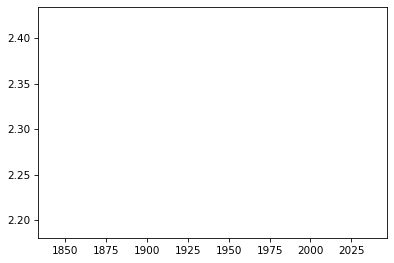

In [194]:
results = run_simulation(system, update_func_alpha)
plot(results, color='blue', label = 'model')